# Cluster plots
Using `stackview.clusterplot` we can visualize contents of pandas DataFrames and corresponding segmented objects in an sime side-by-side. In such a plot you can select objects and visualize the selection. This might be useful for exploring feature extraction parameter spaces.

In [1]:
import pandas as pd
import numpy as np
import stackview
import pandas as pd
from skimage.io import imread, imsave
from skimage.measure import regionprops_table
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from umap import UMAP
import pyclesperanto as cle

To demonstrate this, we need an image, a segmentation and a table of extracted features.

[[[ 2  1  1 ...  2  2  3]
  [ 1  2  2 ...  2  2  2]
  [ 2  2  2 ...  2  2  2]
  ...
  [ 8  8  7 ... 10 10 10]
  [ 6  7  7 ...  9 10 10]
  [ 7  8  8 ...  9  9  9]]

 [[ 2  1  1 ...  1  1  2]
  [ 1  2  2 ...  1  2  2]
  [ 1  2  2 ...  1  2  2]
  ...
  [ 8  7  7 ... 10 10  9]
  [ 7  8  7 ...  9 10 10]
  [ 7  8  9 ...  9  9 10]]

 [[ 2  1  0 ...  1  1  2]
  [ 2  2  1 ...  1  2  2]
  [ 1  2  2 ...  1  2  1]
  ...
  [ 8  7  7 ... 10 10  9]
  [ 8  8  8 ...  8  9 10]
  [ 7  8  9 ...  9  9 10]]

 ...

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 3  2  3 ...  3  4  3]
  [ 2  2  3 ...  3  3  3]
  [ 2  2  3 ...  3  3  3]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 3  2  2 ...  4  3  2]
  [ 2  3  3 ...  3  3  2]
  [ 2  3  3 ...  3  3  2]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 3  2  2 ...  3  3  2]
  [ 2  3  3 ...  2  3  2]
  [ 2  2  3 ...  3  3  2]]]
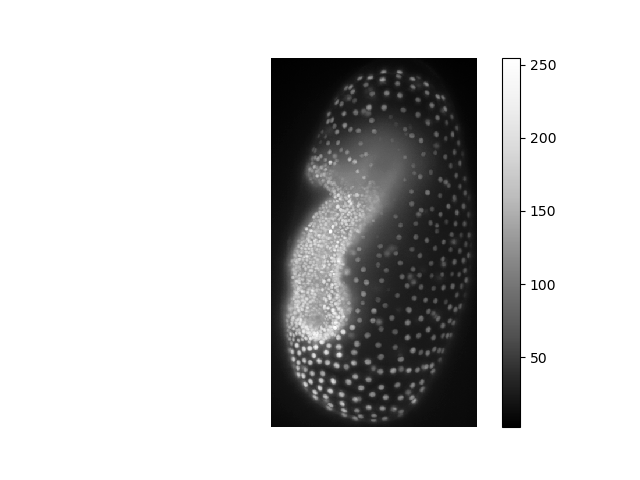
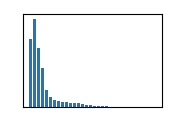

In [2]:
image = imread('../02_bia_bob/data/lund.tif')
stackview.insight(image)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
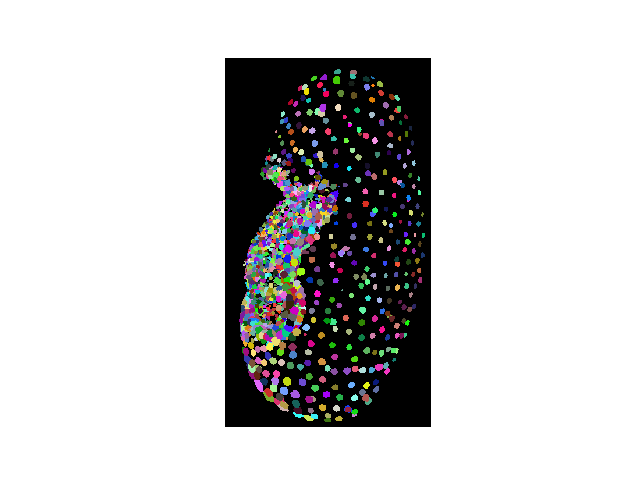

In [3]:
labeled_image = imread('../02_bia_bob/data/lund_labels.tif')

# for reproducibility purposes, the segmented image was made using pyclesperanto:
#background_sub_image = cle.top_hat_box(image, radius_x=15, radius_y=15, radius_z=0)
#labeled_image = cle.voronoi_otsu_labeling(background_sub_image, spot_sigma=1, outline_sigma=0.5)
#labeled_image = np.asarray(cle.exclude_labels_outside_size_range(labeled_image, minimum_size=10, maximum_size=10000000))

stackview.insight(labeled_image)

In [4]:
properties = regionprops_table(labeled_image, intensity_image=image, properties=[
    'mean_intensity', 'std_intensity',
    'centroid',  'area', 'feret_diameter_max', 
    'minor_axis_length', 'major_axis_length'])

df = pd.DataFrame(properties)

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Create UMAP embedding
umap = UMAP(n_components=2, random_state=42) 
umap_coords = umap.fit_transform(scaled_data)

# Add UMAP coordinates to dataframe 
df['UMAP1'] = umap_coords[:, 0]
df['UMAP2'] = umap_coords[:, 1]

df.head()

C:\Users\rober\miniforge3\envs\bob-env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,mean_intensity,std_intensity,centroid-0,centroid-1,centroid-2,area,feret_diameter_max,minor_axis_length,major_axis_length,UMAP1,UMAP2
0,43.500000,3.727312,0.250000,35.142857,252.964286,28.0,7.280110,1.926058,7.071772,-2.623879,2.828131
1,41.200000,1.681269,0.266667,48.200000,253.466667,30.0,6.324555,1.963177,5.986220,-2.604730,2.823892
2,83.397590,6.051864,0.602410,199.795181,64.156627,83.0,9.539392,3.029975,9.910506,3.148098,2.772093
3,103.492308,2.826376,1.069231,211.869231,91.392308,130.0,9.643651,4.389510,8.818684,3.238054,2.795944
4,101.157576,4.142831,1.357576,214.418182,84.763636,165.0,9.899495,5.211984,8.928511,3.224564,2.796298


In [5]:
num_objects = df.shape[0]
pre_selection = np.zeros(num_objects)
pre_selection[:int(num_objects/2)] = 1

df["selection"] = pre_selection

## Interaction
Using some more involved code we can also draw the image and the scatter plot side-by-side and make them interact. You can select data points in the plot on the right and the visualization on the left will be updated accordingly.

In [6]:
stackview.clusterplot(image=image,
                     labels=labeled_image,
                     df=df,
                     column_x="UMAP1",
                     column_y="UMAP2",
                     zoom_factor=0.75,
                     markersize=15,
                     alpha=0.6)

Every time the user selects different data points, the selection in our dataframe is update

In [7]:
df["selection"]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1301    0.0
1302    0.0
1303    0.0
1304    0.0
1305    0.0
Name: selection, Length: 1306, dtype: float64